In [19]:
import pandas as pd
import numpy as np;
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

df = pd.read_excel(r'C:\Users\advay\OneDrive\Desktop\Math data.xlsx')

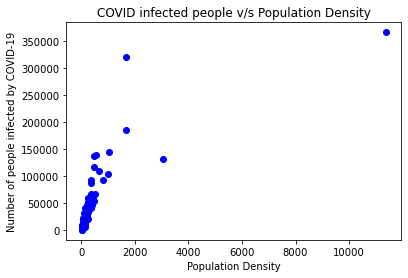

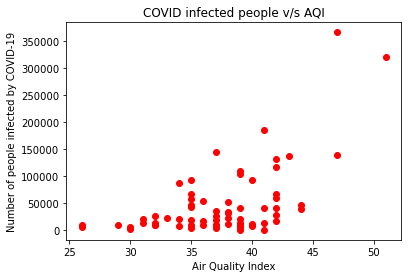

In [20]:
y = df['Infected_People']
x1 = df['Population_Density']
x2 = df['AQI']

plt.plot(x1, y,'bo')
plt.xlabel("Population Density")
plt.ylabel("Number of people infected by COVID-19")
plt.title("COVID infected people v/s Population Density")
plt.show()

plt.plot(x2, y,'ro')
plt.xlabel("Air Quality Index")
plt.ylabel("Number of people infected by COVID-19")
plt.title("COVID infected people v/s AQI")
plt.show()

In [21]:
Y = np.array(y)

df['inter'] = x1 * x2

In [22]:
A=np.ones(len(Y))

X1 = np.c_[A, np.array(x1), np.array(x2), np.array(x1*x2)];

X1 = X1.astype(int);

In [23]:
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X1),X1))

temp = (np.matmul(tmp,np.transpose(X1)))

# INTERCEPT, a, b, c = temp @ np.transpose(X1) @ Y
intercept, a, b, c = np.matmul(temp, Y)
print(intercept, a, b, c)

-613924.7379241299 -15.529256276692582 18816.05222680809 -1.7157999409059819


In [24]:
X1 = sm.add_constant(X1) # adding a constant
model = sm.OLS(Y, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     48.40
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.39e-16
Time:                        22:04:07   Log-Likelihood:                -798.89
No. Observations:                  67   AIC:                             1606.
Df Residuals:                      63   BIC:                             1615.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.612e+05   4.02e+04     -4.013      0.0